# Data modeling and SQL for IMDB data
***

## Overview

A company named MOVIE GEN Corp. needs your help to create and access a movie database. You are interested in helping them create this database. In this assignment, you will load the IMDB data into a database and run queries on it to retrieve records. 

** OBJECTIVE **

In this assignment, you will first examine some flat data and develop an appropriate schema to efficiently represent that data in a SQL database.  You will then create that database, use Python to read and reformat the data and then use SQL commands to populate that database in an appropriate manner. Finally, you will query the database using different approaches and optimizations.

**TASKS**

1. Model data using star schema
3. Use SQL to create a database
4. Use Python to read data and create appropriate SQL commands to populate database 
4. Write relational algebra
5. Run SQL to retrieve records for your customers
7. Improve query performance
8. Database visualization

***
## Part 4.1: Data modeling

Build a **[star schema](https://en.wikipedia.org/wiki/Star_schema)** for the data contained in `all_data.csv`.

Let's first read the csv file and examine its contents.  The strings in `all_data.csv` use the `latin1` character encoding.  When you read in this file using `pandas`, make sure to include this encoding option.

In [1]:
import pandas as pd

# read data in and show head
df = pd.read_csv('all_data.csv', encoding = 'latin1')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Gore Verbinski,302.0,169.0,563,1000,Orlando Bloom,40000,309404152.0,Action,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000,7.1,2.35,0
1,Christopher Nolan,813.0,164.0,22000,23000,Christian Bale,27000,448130642.0,Action,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000,8.5,2.35,164000
2,Andrew Stanton,462.0,132.0,475,530,Samantha Morton,640,73058679.0,Action,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632,6.6,2.35,24000
3,Nathan Greno,324.0,100.0,15,284,Donna Murphy,799,200807262.0,Adventure,Brad Garrett,...,387.0,English,USA,PG,260000000.0,2010.0,553,7.8,1.85,29000
4,David Yates,375.0,153.0,282,10000,Daniel Radcliffe,25000,301956980.0,Adventure,Alan Rickman,...,973.0,English,UK,PG,250000000.0,2009.0,11000,7.5,2.35,10000


There are 24 columns in the csv file.  

** TASK 4.1: ** Draw a star schema for this dataset, save your drawing as an image and attach it to the cell below.

Note: We recommended using Google Drawings. Google Drawings is an online image creator that can be used to draw the Schema, and is what the TAs used to create the Schema in the solution.

Tips:
1. Your star schema should be composed of one fact table and three dimension tables. 
1. For each table, underline primary key.
1. Specify data types for each item.
1. Draw 1:N, N:1, N:N or 1:1 on connecting line.
1. Including image in markdown is easy, see [here](https://stackoverflow.com/questions/255170/markdown-and-image-alignment).

<img style="float: right;" src="a4.jpg">

Correct data type in graph: [gross int -> gross real] 
                            [budget int -> budget real] 
                            [imdb_score int -> imdb_score real] 
                            [aspect_ratio int -> aspect_ratio real]

# YOUR CODE HERE

## Part 4.2: Create database
 
In this part, we will create a [SQLite3 database](https://docs.python.org/3/library/sqlite3.html). This part is really similar to what we saw in lab4b.

The first thing you'll need to do when interacting with a SQLite database (and generally any SQL databases) is to open up a connection (see below). If the database doesn't exist, the SQLite3 module will create one.

In [2]:
import sqlite3
import csv

conn = sqlite3.connect('movie.db')
c = conn.cursor()

** TASK 4.2: ** Fill in function `create_database` with the following instructions.

- [Drop all existing tables](https://www.techonthenet.com/sqlite/tables/drop_table.php) in the database. Doing this will allow us to simply re-run the script if we want to try a new schema.
- [Create the tables](http://www.sqlitetutorial.net/sqlite-create-table) according to your star schema. 

**Note:** 

- To execute queries, simply run the `cursor.execute()` with your query as the argument.
- Remember to to run 'conn.commit()' in order to commit (i.e. save) your changes.
- Remember to define PRIMARY KEYs and FOREIGN KEYs in your table, refer to [here](http://www.sqlitetutorial.net/sqlite-primary-key/).
- Remember to commit the connection to save changes.

In [3]:
def create_database(conn):
    """
    Using the database connection conn, create tables appropriate for 
    storing and using IMDB data.  Drops any pre-exsiting tables that would be re-defined by this procedure.
    """
    c = conn.cursor()
    # YOUR CODE HERE
    c = conn.cursor()
    c.execute('''DROP TABLE IF EXISTS movies''')
    c.execute('''DROP TABLE IF EXISTS actors''')
    c.execute('''DROP TABLE IF EXISTS directors''')
    c.execute('''DROP TABLE IF EXISTS fact_table''')
    
        # Create database with tables.
    
    c.execute("""
            CREATE TABLE directors(
                director_id INTEGER,
                director_name text,
                director_facebook_likes int,
                
                PRIMARY KEY(director_id))""")
    c.execute("""
            CREATE TABLE actors(
                actor_id INTEGER,
                actor_name text,
                actor_facebook_likes int,
                
                PRIMARY KEY(actor_id))""")
    
    c.execute("""
            CREATE TABLE movies(
            movie_id INTEGER,
            num_critic_for_reviews int,
            duration int,
            gross REAL,
            generes text,
            movie_title text,
            num_voted_users int,
            cast_total_facebook_likes int,
            facenumber_in_poster int,
            num_user_for_reviews int,
            language text,
            country text,
            content_rating int,
            budget REAL,
            title_year int,
            imdb_score REAL,
            aspect_ratio REAL,
            movie_facebook_likes int,

            PRIMARY KEY(movie_id))""")

    c.execute("""
            CREATE TABLE fact_table(
                actor1_id int,
                actor2_id int,
                actor3_id int,
                director_id int,
                movie_id int,
                
                FOREIGN KEY (actor1_id,actor2_id,actor3_id) REFERENCES actors(actor_id,actor_id,actor_id),
                FOREIGN KEY (director_id) REFERENCES directors(director_id),
                FOREIGN KEY (movie_id) REFERENCES movies(movie_id))""")
    # Commit all changes
    conn.commit()
    
create_database(conn)

Now, you should be able to view the sqlite3 database which you had created in your assignment directory. Play around with the database! 

You can connect to a sqlite3 database via terminal with the following command:

~~~~
sqlite3 move.db
~~~~

To see the schema of your table, you can run the following command:

~~~~
.schema
~~~~

You can execute arbitrary SQL commands from the `sqlite>` prompt.
More info on your other options can be found here.

~~~~
.help
~~~~

Finally, to exit from a sqlite3 database use the following command:

~~~~
.exit
~~~~

## Part 4.3: Populate database

In **Lab 4b**  we provided you with three different csv files, one for each table. However, this isn't how real world data is typically structured when you first receive it. 

Often, you will receive a single data "dump" file. As a data scientist, you need to figure out how to split it into different tables, and insert the information into a database. 

Fill in function `populate_database` to insert the csv file contents into the movie database.  Below is a listing of column definitions that you might find helpful.

~~~~
0 director_name
1 num_critic_for_reviews
2 duration
3 director_facebook_likes
4 actor_3_facebook_likes
5 actor_2_name
6 actor_1_facebook_likes
7 gross
8 genres
9 actor_1_name
10 movie_title
11 num_voted_users
12 cast_total_facebook_likes
13 actor_3_name
14 facenumber_in_poster
15 num_user_for_reviews
16 language
17 country
18 content_rating
19 budget
20 title_year
21 actor_2_facebook_likes
22 imdb_score
23 aspect_ratio
24 movie_facebook_likes
~~~~

In [4]:
def populate_database(conn, csv_file):
    
    reader = csv.reader(open(csv_file, encoding='latin1'))
    c = conn.cursor()

    director_dic = dict()
    movie_dic = dict()
    actor_dic = dict()

    director_id = 0
    movie_id = 0
    actor_id = 0

    next(reader, None)
    for row in reader:
        row = [item.lower() for item in row]
        
        if row[0] not in director_dic:
            director_id += 1
            director_dic[row[0]] = director_id
            
            try:
                c.execute("""INSERT INTO directors (director_name,director_facebook_likes) VALUES (?,?)""",
                         (row[0], row[3]))
            except sqlite3.Error as e:
                print("directors, insert error:", e.args[0])
        
        if row[10] not in movie_dic: #movie_title is unique
            movie_id += 1
            movie_dic[row[10]] = movie_id

            try:
                c.execute("""INSERT INTO movies (movie_title,num_critic_for_reviews,duration,facenumber_in_poster,
                                                  gross,num_voted_users,cast_total_facebook_likes,generes,num_user_for_reviews,
                                                  language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,
                                                  movie_facebook_likes) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)""",
                        (row[10], row[1],row[2],row[14],row[7],
                        row[11],row[12],row[8],row[15],row[16],
                        row[17],row[18],row[19],row[20],row[22],row[23],row[24]))
            except sqlite3.Error as e:
                print("movie, insert error:", e.args[0])
                
        if row[9] not in actor_dic:
            actor_id += 1
            actor_dic[row[9]] = actor_id
                
            try:
                c.execute("""INSERT INTO actors (actor_name, actor_facebook_likes) VALUES (?,?)""",
                             (row[9], row[6]))
            except sqlite3.Error as e:
                print("actor, insert error:", e.args[0])

        if row[5] not in actor_dic:
            actor_id += 1
            actor_dic[row[5]] = actor_id
                
            try:
                c.execute("""INSERT INTO actors (actor_name, actor_facebook_likes) VALUES (?,?)""",
                             (row[5], row[21]))
            except sqlite3.Error as e:
                print("actor, insert error:", e.args[0])


        if row[13] not in actor_dic:
            actor_id += 1
            actor_dic[row[13]] = actor_id
                
            try:
                c.execute("""INSERT INTO actors (actor_name, actor_facebook_likes) VALUES (?,?)""",
                             (row[13], row[4]))
            except sqlite3.Error as e:
                print("actor, insert error:", e.args[0])
       
        try:
            c.execute(""" INSERT INTO fact_table (actor1_id, actor2_id, actor3_id,director_id,movie_id)
                        SELECT a1.actor_id,a2.actor_id,a3.actor_id,directors.director_id,movies.movie_id
                        FROM actors a1, actors a2, actors a3,directors,movies
                        WHERE a1.actor_name=? AND a2.actor_name=? AND a3.actor_name=? AND directors.director_name = ?
                        AND movies.movie_title= ?""",(row[9],row[5],row[13],row[0],row[10]))
        except sqlite3.Error as e:
            print("fact_table, insert error:", e.args[0])

    conn.commit()
        
populate_database(conn, 'all_data.csv')

In [5]:
import pandas as pd
for t in["actors"]:
    print('%s:'%t)
    print(pd.read_sql_query("SELECT * FROM %s"%t, conn), '\n')

movies:
      movie_id  num_critic_for_reviews  duration        gross      generes  \
0            1                     302       169  309404152.0       action   
1            2                     813       164  448130642.0       action   
2            3                     462       132   73058679.0       action   
3            4                     324       100  200807262.0    adventure   
4            5                     375       153  301956980.0    adventure   
5            6                     403       106  168368427.0       action   
6            7                     313       151  423032628.0       action   
7            8                     450       150   89289910.0       action   
8            9                     258       150  141614023.0       action   
9           10                     448       136  241063875.0       action   
10          11                     451       106  179020854.0       action   
11          12                     599       153  262030

## Part 4.4: Relational Algebra

In this part, your task is to write relational algebra expressions based on the following three tables that represent a very limited subset of the IMDB dataset. 

`actors` Table:

| name | country | facebook_likes |age|               
|---------------|------|------|------| 
| Jennifer Lawrence| U.S. |34000 |26 | 
|  Johnny Depp  | U.S.| 40000| 54|                    
|Daniel Radcliffe | U.K.|11000 | 28|
| Leonardo DiCaprio|U.S. |29000 | 42| 
|Robin Wright | U.S.|18000 | 51|
|Josh Hutcherson |U.S. |14000 | 24| 
| Peter Dinklage| U.S.|22000 |48 | 

`actor_movies` Table:

| name| movie_name|
|------|------|
| Jennifer Lawrence| X-Men: Days of Future Past |
|Johnny Depp|Pirates of the Caribbean: At World's End|
|Robin Wright | The Girl with the Dragon Tattoo |
| Jennifer Lawrence| The Hunger Games: Mockingjay - Part 2 |
|Leonardo DiCaprio | Inception |
| Peter Dinklage|X-Men: Days of Future Past |
|Josh Hutcherson | The Hunger Games: Mockingjay - Part 2|

`directors` Table:

| name | country | facebook_likes |age|               
|---------------|------|------|------|  
| Christopher Nolan| U.K. |22000 |46 | 
| Alfonso Cuarón   | Mexico| 10000| 55|                    
|Shane Black | U.S.|1000 | 55|
| David Fincher|U.S. |21000 | 54| 
|J.J. Abrams | U.S.|14000 | 51|

`director_movies` Table:

| name| movie_name|
|------|------|
| Christopher Nolan| Inception |
|Shane Black|Iron Man 3|
|Alfonso Cuarón | Gravity |
| J.J. Abrams| Star Wars: The Force Awakens|
|David Fincher | The Girl with the Dragon Tattoo |

#### TASK 4: Based on the tables above, answer the following using relational algebra.
1. Find the name of all movies that have leading american actors who are over 50-years-old.
1. Find the name of all actors/actress that didn't star in the movie _Inception_.
1. Find the name of all movies that have both famous directors and famous actors. (Assume people with at least 20,000 facebook are famous.)
1. Find the name of actor/actress that has the highest number of movies.<br>
    Hint: use aggregate functions
1. Find the name of movies whose actor has the highest number of facebook likes.<br>
    Hint: use aggregate functions/temp variables

_write your answers in this cell_

# YOUR CODE HERE
1.$\pi_{movie\_name}$($\sigma_{country="U.S."  age>50}$(actors $\bowtie$ actor_movies))

2.$\pi_{name}$($\sigma_{movie\_name!="Inception"}$(actors $\bowtie$ actor_movies))

3.$\pi_{movie\_name}$($\sigma_{facebook\_likes>20,000}$(actors $\bowtie$ actor\_movies) $\bowtie$ $\sigma_{facebook\_likes>20,000}$(directors $\bowtie$ director_movies))

4.temp = $\chi_{\{name\},\{group(name),count(movie\_name)\ as\ movie\_count\}}$(actor_movies)

$\pi_{name}$($\chi_{\{*\},{max(movie\_count)}}$(temp) $\bowtie$ (temp))

5.temp = (actors) $\bowtie$ (actor_movies)

$\pi_{movie\_name}$($\chi_{\{*\},\{max(facebook\_likes)\}}$(temp) $\bowtie$ (temp))

***
## Part 4.5: Running Queries

Now that you have created a database with the IMDB data. Your customer needs records that satisfy their requirements based on several constraints in order to improve their business revenue. 
In this part, you will create several SQL statements to extract them. 

IPython has a built-in module called [sql](https://pypi.python.org/pypi/ipython-sql) which allows us to easily interface with a database. The following two lines load this SQL extension and connect to your IMDB database:

In [10]:
!pip install ipython-sql

In [1]:
%reload_ext sql
%sql sqlite:///movie.db

'Connected: None@movie.db'

Your task is to write 10 queries that fetch certain records for your customers. To run SQL queries, first call <font color = "red">%%sql</font> magic and then write your SQL queries.

**Query 4.1: Find the number of directors in the directors table.**


In [6]:
%%sql
SELECT count("director_name") AS num_of_directors FROM directors;

Done.


num_of_directors
1453



**Query 4.2: Find the number of actors in the actors table.**


In [7]:
%%sql
SELECT count("actor_name") AS num_of_actors FROM actors;

Done.


num_of_actors
3872



**Query 4.3: Find the number of movies in the movies table.**


In [8]:
%%sql
SELECT count(movie_title) AS num_of_movies FROM movies

Done.


num_of_movies
3023



There should be 1453 directors, 3872 actors, 3023 movies. Please make sure you get the same results before running the following queries.

Now, we can have some fun querying the database!

**Query 4.4: Find years that have more than 100 movies and arrange them in ascending order. **


In [9]:
%%sql
SELECT title_year,count(movie_title) as movies_in_year
FROM movies
GROUP BY title_year
HAVING movies_in_year > 100
ORDER BY movies_in_year ASC;

Done.


title_year,movies_in_year
2003,116
2014,118
2007,120
2000,123
1999,125
2013,130
2012,133
2009,142
2010,142
2004,146



**Query 4.5: Order director name from most Facebook likes to fewest Facebook likes and only show top 10 directors.**


In [10]:
%%sql
SELECT director_name,director_facebook_likes
FROM directors
ORDER BY director_facebook_likes DESC
LIMIT 10;

Done.


director_name,director_facebook_likes
joseph gordon-levitt,23000
christopher nolan,22000
david fincher,21000
kevin spacey,18000
denzel washington,18000
martin scorsese,17000
quentin tarantino,16000
clint eastwood,16000
tom hanks,15000
j.j. abrams,14000



**Query 6: Find the titles of movies that are directed by Christopher Nolan and order them by movie title. **


In [11]:
%%sql
SELECT d.director_name,m.movie_title 
FROM fact_table
JOIN directors d
ON fact_table.director_id = d.director_id
JOIN movies m
ON fact_table.movie_id = m.movie_id
WHERE d.director_name = "christopher nolan"
ORDER BY movie_title;

Done.


director_name,movie_title
christopher nolan,batman begins
christopher nolan,inception
christopher nolan,insomnia
christopher nolan,interstellar
christopher nolan,memento
christopher nolan,the dark knight
christopher nolan,the dark knight rises
christopher nolan,the prestige



** Query 4.7: Find all the directors who directed at least 5 movies since 2007 (included) sorted by the number of movies in descending order.**


In [12]:
%%sql
SELECT d.director_name,COUNT(m.movie_title) AS num_movies 
FROM fact_table
JOIN directors d
ON fact_table.director_id = d.director_id
JOIN movies m
ON fact_table.movie_id = m.movie_id
WHERE m.title_year >= 2007
GROUP BY d.director_name
HAVING num_movies >= 5
ORDER BY num_movies DESC;

Done.


director_name,num_movies
clint eastwood,7
ethan coen,6
shawn levy,6
steven spielberg,6
woody allen,6
andy fickman,5
antoine fuqua,5
david ayer,5
david fincher,5
dennis dugan,5



**Query 4.8: Find the top five most productive actors since 2010 (included).**


In [13]:
%%sql
SELECT a.actor_name,COUNT(m.movie_id) AS num_movie_acted FROM actors a, movies m, fact_table f
WHERE m.movie_id = f.movie_id AND m.title_year >= 2010 AND (f.actor1_id = a.actor_id OR f.actor2_id = a.actor_id OR f.actor3_id = a.actor_id)
GROUP BY a.actor_id
ORDER BY num_movie_acted DESC
LIMIT 5;

Done.


actor_name,num_movie_acted
liam neeson,13
steve carell,12
bradley cooper,11
jennifer lawrence,11
channing tatum,11



**Query 4.9: Find all the actors who have collaborated with Christopher Nolan, sorted by their collaboration frequency in descending order.**


In [45]:
%%sql
SELECT a.actor_name,COUNT(a.actor_id) AS frequency FROM fact_table f
JOIN actors a ON f.actor1_id = a.actor_id
                OR f.actor2_id = a.actor_id
                OR f.actor3_id = a.actor_id
WHERE f.director_id IN (SELECT d.director_id FROM directors d WHERE d.director_name = "christopher nolan")
GROUP BY a.actor_id
ORDER BY frequency DESC;

Done.


actor_name,frequency
christian bale,4
tom hardy,2
joseph gordon-levitt,2
morgan freeman,2
scarlett johansson,1
liam neeson,1
anne hathaway,1
hugh jackman,1
leonardo dicaprio,1
heath ledger,1



**Query 4.10: Without using an aggregation operator, write a SQL statement that finds the title of the movie(s) with the most Facebook likes.**


In [14]:
%%sql
SELECT movie_title,movie_facebook_likes
FROM movies
ORDER BY movie_facebook_likes DESC
LIMIT 1;

Done.


movie_title,movie_facebook_likes
interstellar,349000


### END SOLUTION

## Part 4.6: Database Visualization

Since your customer isn't very good with databases, SQL or tabluar data,  they want your help visualizing some of database. With the help of SQL, you can easily retrieve data from the database, and then use pandas dataframes and `matlabplotlib.pyplot` to create the visualizations.

Note: refer to Pandas visualization method [here](https://pandas.pydata.org/pandas-docs/stable/visualization.html).

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

** Example **:
The customer wants a a bar chart of the top 10 actors(based on facebook likes), sorted in descending order. 

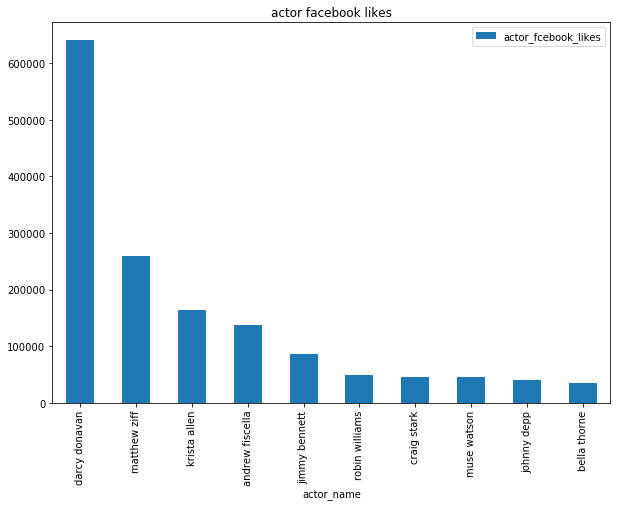

In [18]:
# Solution

c.execute('''
        SELECT actor_name, actor_facebook_likes
        FROM actors
        ORDER BY actor_facebook_likes DESC
        LIMIT 10''')
dataframe = pd.DataFrame(data = c.fetchall(), columns = ['actor_name', 'actor_fcebook_likes'])
dataframe.plot.bar(x='actor_name', title='actor facebook likes', figsize=(10,7))

** Task 4.5 **: Create box plots of movie duration, imdb_score and num_critic_for_reviews.  Hint: Create each in its own plot, otherwise the y-axis will not be informative.

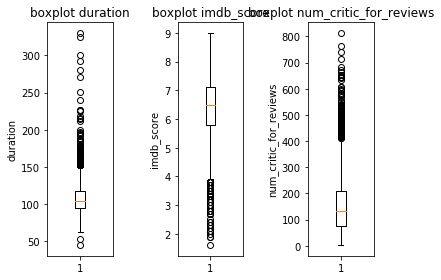

In [19]:
# YOUR CODE HERE
# box plot of movie duration
c.execute("""
        SELECT movie_title, duration
        FROM movies
        """)
df1 = pd.DataFrame(data = c.fetchall(), columns = ['movie_title', 'duration'])

# box plot of movie imdb_score
c.execute("""
        SELECT movie_title, imdb_score
        FROM movies
        """)
df2 = pd.DataFrame(data = c.fetchall(), columns = ['movie_title', 'imdb_score'])

# box plot of movie imdb_score
c.execute("""
        SELECT movie_title, num_critic_for_reviews
        FROM movies
        """)
df3 = pd.DataFrame(data = c.fetchall(), columns = ['movie_title', 'num_critic_for_reviews'])

plt.figure(1)

plt.subplot(131)
plt.boxplot(df1["duration"])
plt.ylabel("duration")
plt.title("boxplot duration")

plt.subplot(132)
plt.boxplot(df2["imdb_score"])
plt.ylabel("imdb_score")
plt.title("boxplot imdb_score")

plt.subplot(133)
plt.boxplot(df3["num_critic_for_reviews"])
plt.ylabel("num_critic_for_reviews")
plt.title("boxplot num_critic_for_reviews")

plt.tight_layout()


plt.show()

** Task 4.6 **: Create a pie chart of movie counts per country of countries that have more than 10 movies

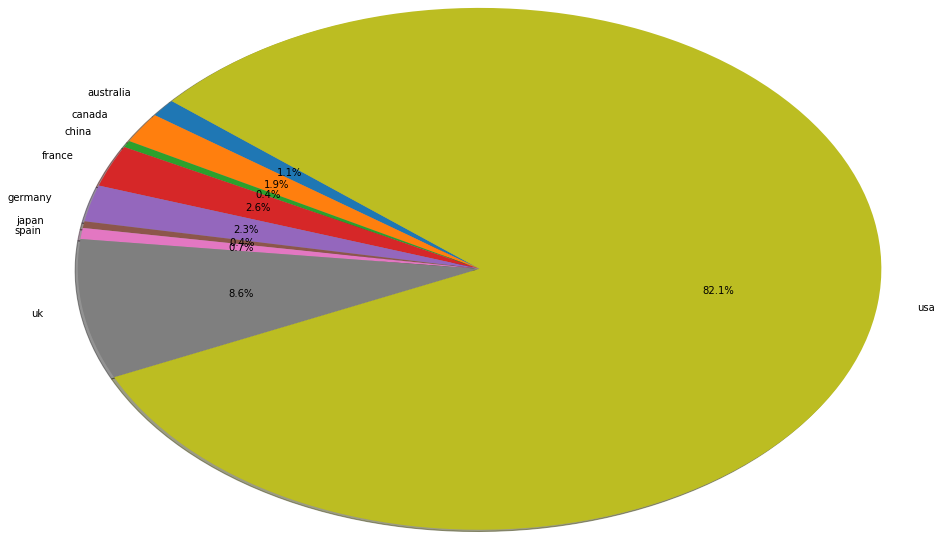

In [20]:
c.execute('''
        SELECT country, COUNT(movie_title) AS num_movie
        FROM movies
        GROUP BY country
        HAVING num_movie > 10''')
df = pd.DataFrame(data = c.fetchall(), columns = ['country', 'num_movie'])

sizes = df["num_movie"]
labels = df["country"]

plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,radius=3)
plt.show()

** Task 4.7 **: Plot a curve of cumulative number of movies released over time.

** hint **: use [cumsum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html) function.

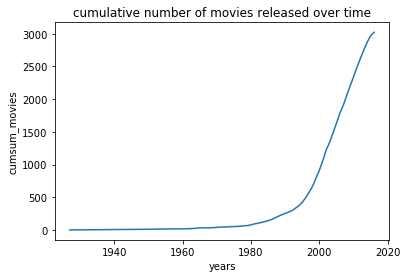

In [21]:
# YOUR CODE HERE
c.execute('''
        SELECT title_year, COUNT(movie_title) AS num_movie_year
        FROM movies
        GROUP BY title_year
        ''')
df = pd.DataFrame(data = c.fetchall(), columns = ['title_year', 'num_movie_year'])
df["cumsum"] = df["num_movie_year"].cumsum()

x=df["title_year"]
y=df["cumsum"]

plt.xlabel("years")
plt.ylabel("cumsum_movies")
plt.title("cumulative number of movies released over time")

plt.plot(x, y)
plt.show()

***
## Part 4.7: Query Optimization
In this part, we will see how to optimize database access by indexing and using materialized views. 

The next three functions create and exercise a toy database.
`setup_test` creates a connection to the database.  `insert_test` performs `num` SQL `SELECT`s, the  function `select_test` does `num` SQL `INSERT`s.  

In [22]:
def setup_test(db):
    conn = sqlite3.connect(db)
    conn.execute('DROP TABLE IF EXISTS scripts')
    conn.execute('''
            CREATE TABLE scripts (
                script_id INTEGER,
                author_name text,
                script_name text,
                author_facebook_likes int,
                PRIMARY KEY(script_id))
                ''')
    conn.commit()
    return conn
                

def insert_test(conn, num):
    c = conn.cursor()
    for i in range(num):
        c.execute('''INSERT INTO scripts (script_name) VALUES ('Dr. Who %d')'''%i)
    conn.commit()

def select_test(conn, num):
    c = conn.cursor()
    for i in range(num):
        c.execute('''SELECT * 
                     FROM scripts
                     WHERE script_name = "Dr. Who %d"'''%i)

Below is some code for benchmarking your database.  Run it to see how well your database currently performs.

In [23]:
conn = setup_test('test.db')
insert_test(conn, 15000)

In [24]:
%timeit -n 3 -r 3 insert_test(conn, 15000)

3 loops, best of 3: 382 ms per loop


In [25]:
%timeit -n 3 -r 3 select_test(conn, 5000)

3 loops, best of 3: 2.24 s per loop


### Indexing

** Task 4.8 **: Optimize the database so that `test_select` test performs more quickly.  Fill in the appropriate SQL commands in the cell below.  

Hint: try adding an INDEX

Note: The line `!cp movie.db movie1.db` copies your `movie.db` database to `movie1.db`.

In [26]:
def setup_test(db):
    conn = sqlite3.connect(db)
    conn.execute('DROP TABLE IF EXISTS scripts')
    conn.execute('''
            CREATE TABLE scripts (
                script_id INTEGER,
                author_name text,
                script_name text,
                author_facebook_likes int,
                PRIMARY KEY(script_id))
                ''')
    conn.execute("""CREATE INDEX script_index ON scripts(script_name)""")
    conn.commit()
    return conn

conn1 = setup_test('test1.db')

Run the following code to see how your optimization performs.

In [27]:
%timeit -n 3 -r 3 insert_test(conn1,15000)

3 loops, best of 3: 802 ms per loop


In [28]:
%timeit -n 3 -r 3 select_test(conn1, 5000)

3 loops, best of 3: 672 ms per loop


** Task 4.9 **: Explain the performance changes you see.  Have any trade-offs been made?

# YOUR CODE HERE
1. The time of insert_test increased slightly 
2. The time of select_test decreased dramatically

This change is acceptable because of two reasons: 
first the increase of inserting data is very short,
second the frequency of using select is larger than insert data.
Hence the overall time is decreased a lot.

### Temporary Tables
Looking at the source code you have developed for the company you notice the following query turns out to be a bottle neck, 

```
SELECT * FROM actors a, directors d, movies m, facts f 
                WHERE a.actor_id = f.actor_1_id AND d.director_id = f.director_id AND m.movie_id = f.movie_id
```

Below is some code to benchmark it's performance.  Try running it.

In [29]:
def test(conn, num):
    c = conn.cursor()
    for i in range(num):
        c.execute(
            '''SELECT * FROM actors a, directors d, movies m, fact_table f 
                WHERE a.actor_id = f.actor1_id AND d.director_id = f.director_id AND m.movie_id = f.movie_id''')
        conn.commit()

In [30]:
conn = sqlite3.connect('movie.db')
%timeit test(conn,50000)

1 loop, best of 3: 5.69 s per loop


In [31]:
def setup_mytmp(conn):
    ''' Create a temporary table for a common query's results'''
    c = conn.cursor()
    c.execute('''DROP TABLE IF EXISTS mytmp''')
    c.execute("""INSERT INTO mytemp
                SELECT * FROM WHERE (SELECT actors a, directors d, movies m, fact_table f 
                WHERE a.actor_id = f.actor1_id AND d.director_id = f.director_id AND m.movie_id = f.movie_id
                """)

** Task 4.10: ** One way to speed this query up is to store it's results and refer to them as needed, as opposed to rerunning the query.  Do this *inside* the database by using SQL to create a tempory table called 'testtmp' of these search results.  Write solution below, and then use the benchmarking code provided to test it.

In [32]:
def setup_mytmp(conn):
    ''' Create a temporary table for a common query's results'''
    c = conn.cursor()
    c.execute('''DROP TABLE IF EXISTS mytmp''')
    c.execute("""CREATE TEMPORARY TABLE mytmp (actor_id int,
                                    actor_name text,
                                    actor_facebook_likes int,
                                    director_id int,
                                    director_name text,
                                    director_facebook_likes int,
                                    movie_id int,
                                    num_critic_for_reviews int,
                                    duration int,
                                    gross real,
                                    generes text,
                                    movie_title text,
                                    num_voted_users text,
                                    cast_total_facebook_likes text,
                                    facenumber_in_poster int,
                                    num_user_for_reviews int,
                                    language text,
                                    country text,
                                    content_rating text,
                                    budget real,
                                    title_year int,
                                    imdb_score real,
                                    aspect_ratio real,
                                    movie_facebook_likes int,
                                    actor1_id int,
                                    actor2_id int,
                                    actor3_id int,
                                    director_id_1 int,
                                    movie_id_1 int)""")
    c.execute("""INSERT INTO mytmp (actor_id,
                                    actor_name,
                                    actor_facebook_likes,
                                    director_id,
                                    director_name,
                                    director_facebook_likes,
                                    movie_id,
                                    num_critic_for_reviews,
                                    duration,
                                    gross,
                                    generes,
                                    movie_title,
                                    num_voted_users,
                                    cast_total_facebook_likes,
                                    facenumber_in_poster,
                                    num_user_for_reviews,
                                    language,
                                    country,
                                    content_rating,
                                    budget,
                                    title_year,
                                    imdb_score,
                                    aspect_ratio,
                                    movie_facebook_likes,
                                    actor1_id,
                                    actor2_id,
                                    actor3_id,
                                    director_id_1,
                                    movie_id_1)
                SELECT * FROM actors a, directors d, movies m, fact_table f 
                WHERE a.actor_id = f.actor1_id AND d.director_id = f.director_id AND m.movie_id = f.movie_id""")

In [33]:
def test_mytmp(conn, num):
    c = conn.cursor()
    setup_mytmp(conn)
    for i in range(num):
        c.execute('''SELECT * FROM mytmp''')

        
%timeit test_mytmp(conn, 50000)

1 loop, best of 3: 1.46 s per loop


### Analysis

In this example, the run time of each test depends on the parameter `num`. The code below runs both `test` and your optimized version `test_mytmp` with `num = [100, 200, 400, 800, 1600, 3200, 6400]` and plots the run time performance of each function.  Note: This function uses `timeit` to find best execution times using repeated trials, the number of trails used depends on each trails run time (shorter times use more trials).

100 loops, best of 3: 11.2 ms per loop
100 loops, best of 3: 17.1 ms per loop
10 loops, best of 3: 21.9 ms per loop
100 loops, best of 3: 20.2 ms per loop
10 loops, best of 3: 44 ms per loop
10 loops, best of 3: 25.2 ms per loop
10 loops, best of 3: 88.9 ms per loop
10 loops, best of 3: 37.5 ms per loop
10 loops, best of 3: 179 ms per loop
10 loops, best of 3: 60.4 ms per loop
1 loop, best of 3: 356 ms per loop
10 loops, best of 3: 105 ms per loop
1 loop, best of 3: 734 ms per loop
1 loop, best of 3: 213 ms per loop


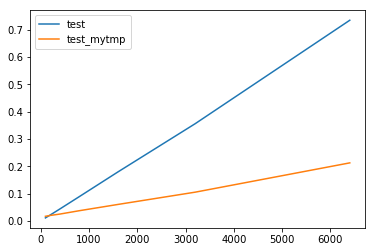

In [34]:
import timeit as timeit

X = [100, 200, 400, 800, 1600, 3200, 6400]
a = []
b = []
for i in X:
    result = %timeit -o test(conn,i)
    a.append(result.best)
    result = %timeit -o test_mytmp(conn,i)
    b.append(result.best)     
    
plt.plot(X, a, label = 'test')
plt.plot(X, b, label = 'test_mytmp')
plt.xlabel = 'number of select'
plt.ylabel = 'time / s'
plt.legend()

plt.show()

** Task 4.11 ** What do the performance curves tell you about the use of temporary tables in this example? (you may need to run this code a few times to get a good feel for the situation)

_write your answer here_

1.As the num of select increases, time of test increases more rapidaly than test_mytmp. Which means we could save a significant amount of 
time if we select a lot of times using temporary table.In general, if manipulation of data that cannot be done within a single query, using temprary table saves time.